In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from pandas_profiling import ProfileReport

In [16]:
import seaborn as sns

## Importing and creating dataset

In [2]:
#loading boston dataset feature data
boston = load_boston()
bos = pd.DataFrame(boston.data,columns=boston.feature_names)

In [3]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
#loading boston dataset target data
bos_t=pd.DataFrame(boston.target,columns=['Target'])
bos_t.head()

,Target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [5]:
print(bos.shape)
print(bos_t.shape)

(506, 13)
(506, 1)


In [6]:
#Combine feature and target data
df=pd.concat([bos,bos_t],axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
#Size of the data
df.shape

(506, 14)

In [8]:
#Basic data description
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Observations from above dataset
#### 1)There are no missing values
#### 2)There is lot of variation in range of features

In [9]:
#datatype of each column
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Target     float64
dtype: object

In [10]:
# About the dataset
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [102]:
# a=ProfileReport(df)
# a.to_widgets()

In [12]:
# Plotting correlation matrix of the dataset
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### Observations from the above plot
#### 1)RM,PTRatio,LSTAT has high correlation with target compared to other features.So we will use these features to predict the target.

In [13]:
df_final=df[['RM','PTRATIO','LSTAT','Target']]

In [14]:
# Final dataset used for model building
df_final.head()

,RM,PTRATIO,LSTAT,Target
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


In [15]:
# Plotting correlation matrix of final dataset
corr = df_final.corr()
corr.style.background_gradient(cmap='coolwarm')

,RM,PTRATIO,LSTAT,Target
RM,1.000000,-0.355501,-0.613808,0.695360
PTRATIO,-0.355501,1.000000,0.374044,-0.507787
LSTAT,-0.613808,0.374044,1.000000,-0.737663
Target,0.695360,-0.507787,-0.737663,1.000000


### Observation from above matrix
#### We can also see that there is no much correlation between the features(between + and - 0.9).So no multicollinearity

# Preprocessing 

## Checking the distribution of features

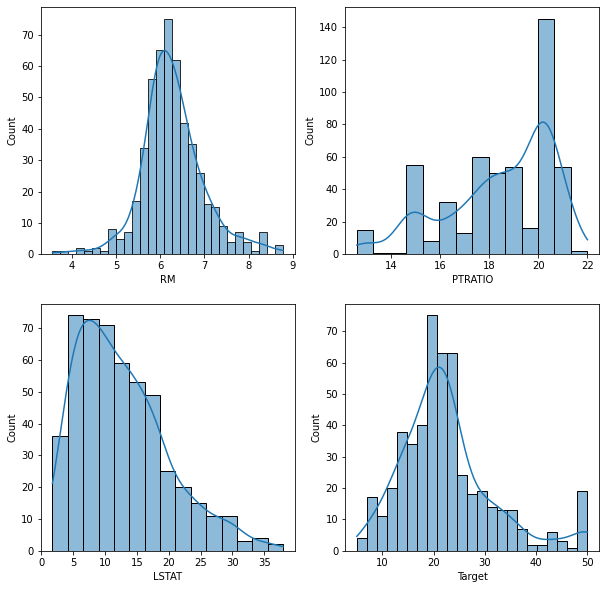

In [112]:
p=1
plt.figure(figsize=(10,10))
for i in df_final.columns:
    plt.subplot(2,2,p)   #to specify number of rows and columns and postion of each graph
    sns.histplot(df_final[i],kde=True)
    p=p+1

### Observation from above graphs
#### 1) RM-Gaussian distribution   , PTRATIO- Left skewed ,LSTAT- Right skewed. PTRATIO and LSTAT has to be converted to normal distribution.

## Checking for Outliers

In [113]:
#Seperating features and target
x=df_final.drop('Target',axis=1)
y=df.Target

<AxesSubplot:>

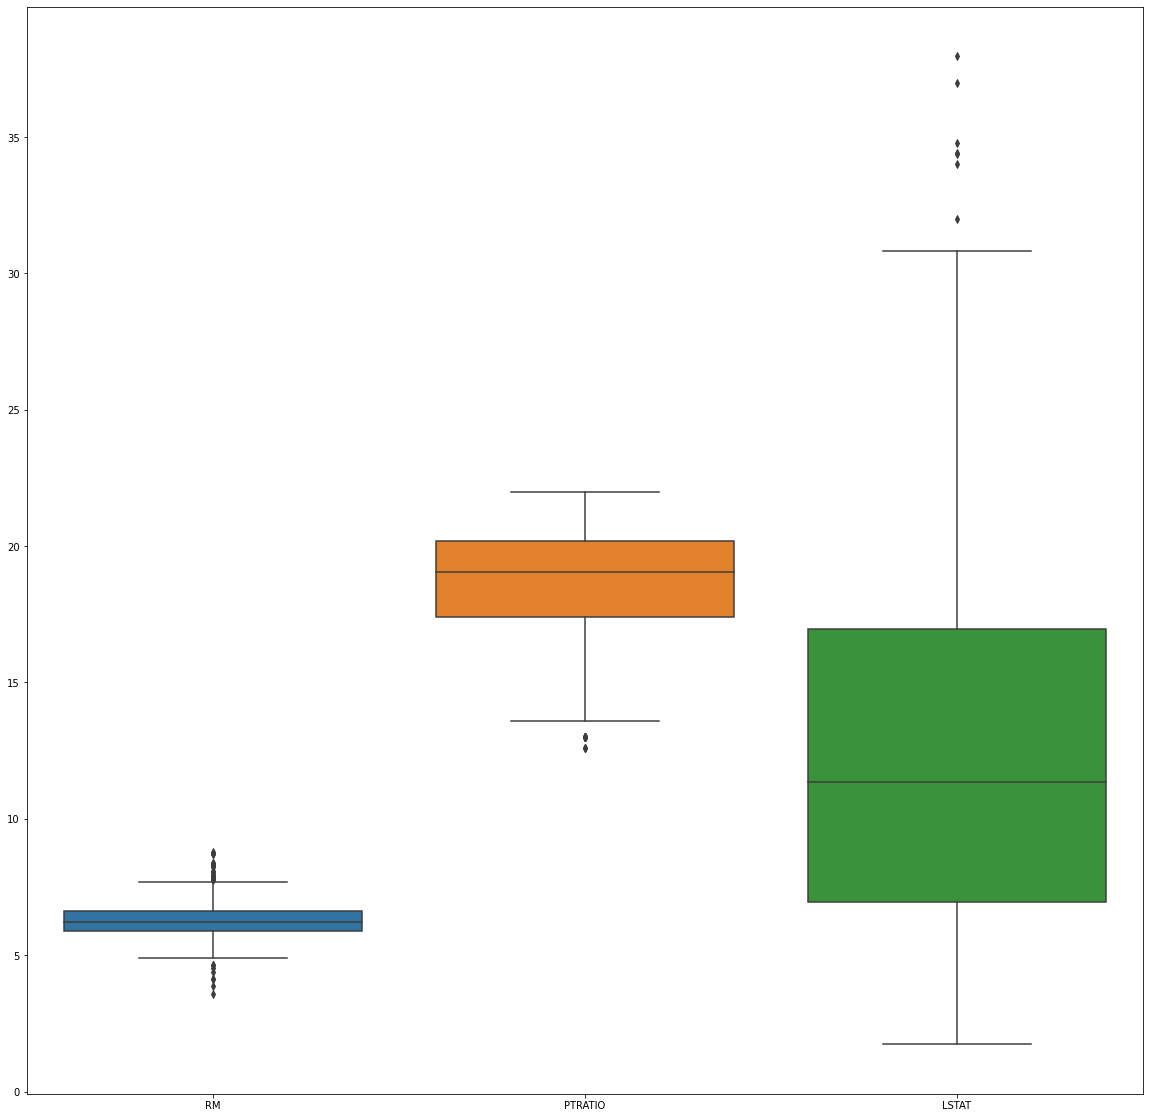

In [26]:
fig ,ax =plt.subplots(figsize =(20,20))
sns.boxplot(data=x,ax=ax)

#### From above boxplot we can see that the outliers are present in cas of all the features

## Outlier Handling

In [27]:
#Dataset for outlier handling
df_out=df_final.copy()

In [28]:
#Size of data before outlier handling
df_out.shape

(506, 4)

In [29]:
# Outlier handling by using IQR Method
for i in x.columns:
    q1=df_out[i].quantile(0.25)  #get 25th quantile
    q2=df_out[i].quantile(0.50)  #get 50th quantile
    q3=df_out[i].quantile(0.75)  #get 75th quantile
    IQR=q3-q1                    #Inter quantile range
    l_bound=q1-(IQR*1.5)         #Lower bound 
    u_bound=q3+(IQR*1.5)         #Upper bound
    df_out=df_out[(df_out[i]>l_bound) & (df_out[i]<u_bound)]   #Select all data between lbound and ubound

In [30]:
#Size of data after outlier handling
df_out.shape

(460, 4)

<AxesSubplot:>

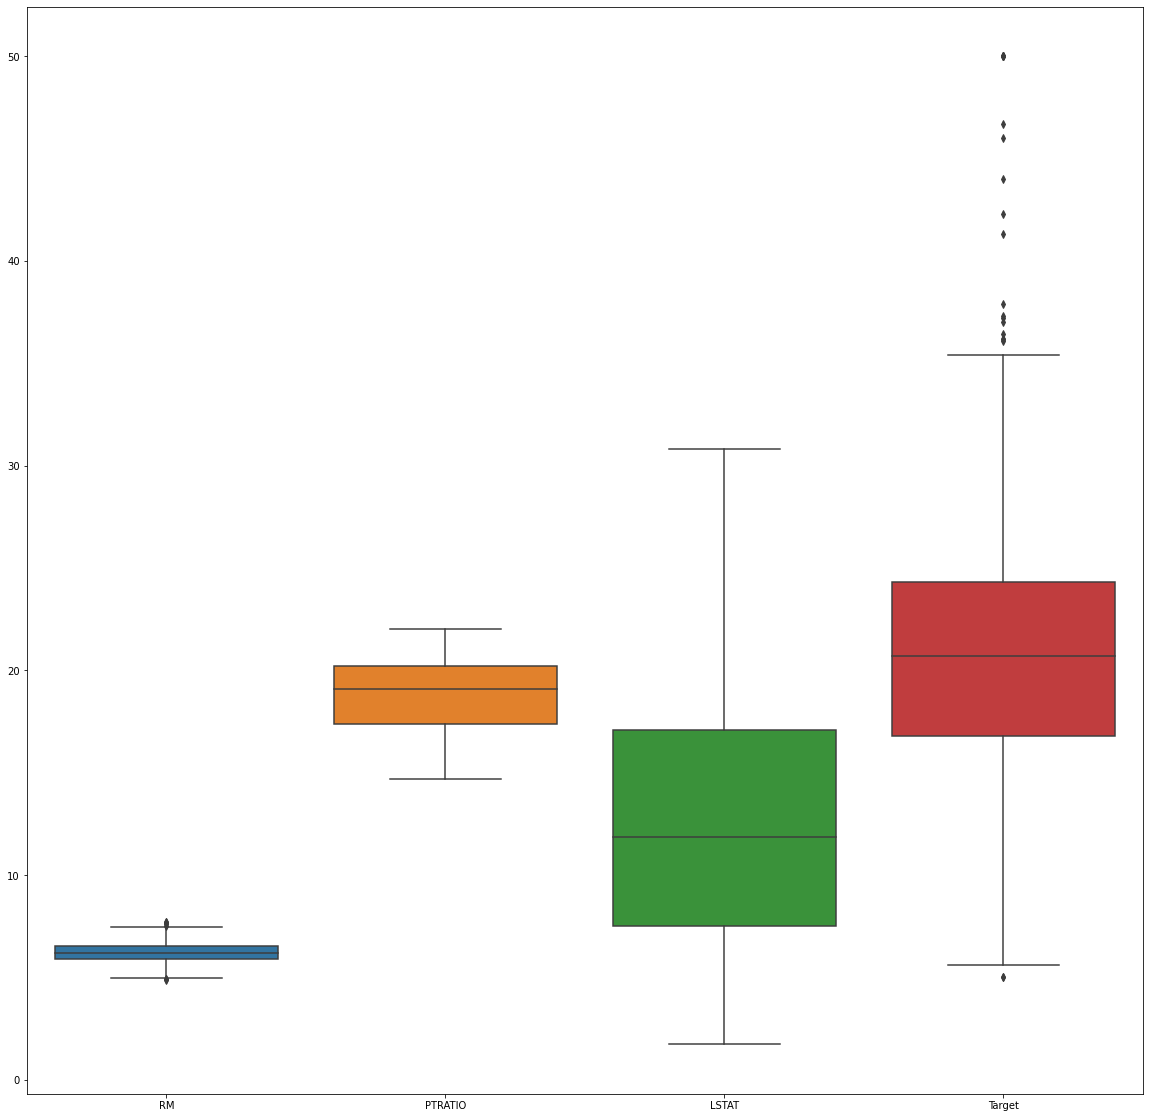

In [34]:
# Boxplot after outlier handling
fig ,ax =plt.subplots(figsize =(20,20))
sns.boxplot(data=df_out,ax=ax)

#### From above boxplot we can see that for all features the outliers are removed

## Transformation of features to normal distribution

In [137]:
x=df_out.drop('Target',axis=1)
y=df_out['Target']

In [48]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    

RM


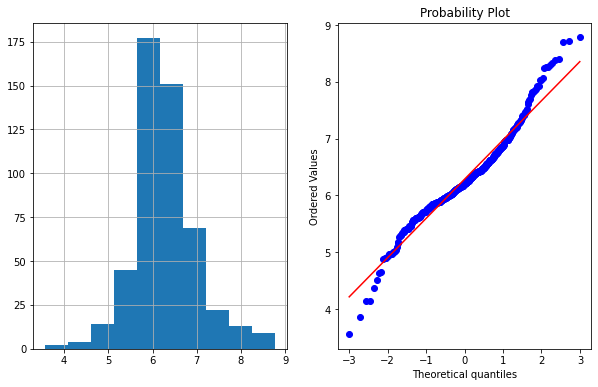

PTRATIO


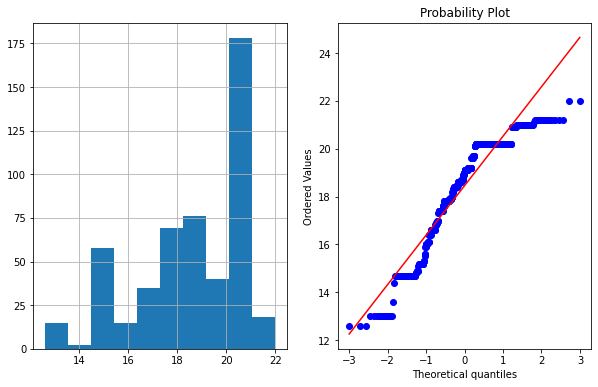

LSTAT


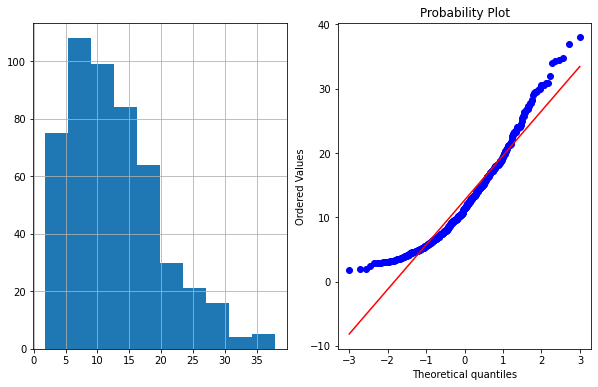

In [117]:
# Plot qq plot of each feature
for i in x.columns:
    print(i)
    plot_data(x,i) 

In [138]:
#dataset for transformation
df_trans=x.copy()

In [139]:
#Import library for power transformation
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(standardize =False)
#df_pt=pt.fit_transform(x[['PTRATIO','LSTAT']])

RM
Without transformation


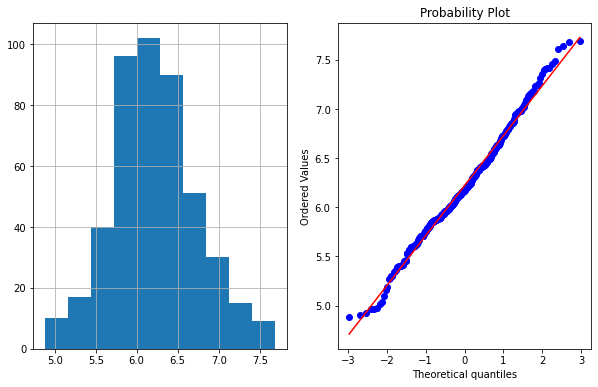

LOG TRANSFORMATION


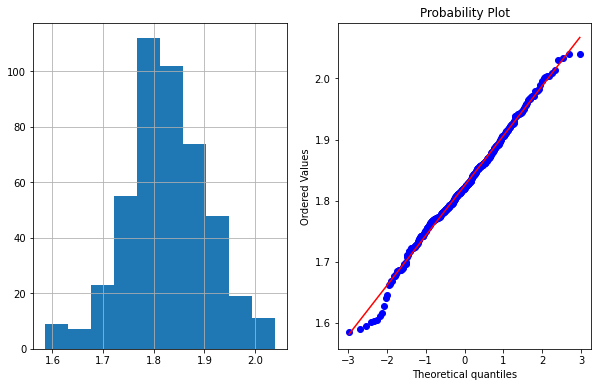

SQUARE TRANSFORMATION


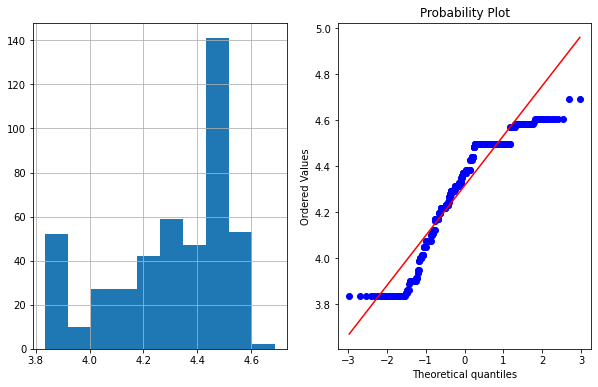

YEO JOHNSON TRANSFORMATION


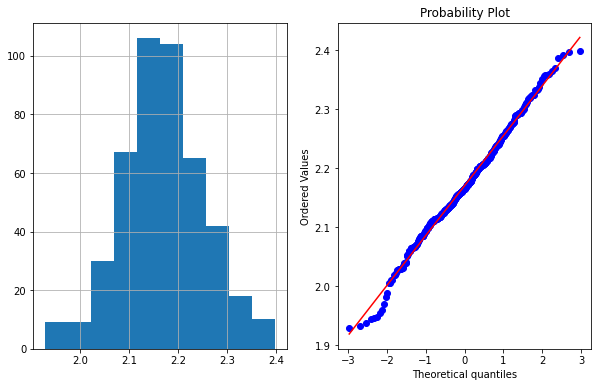

************************************************************************************************************************
PTRATIO
Without transformation


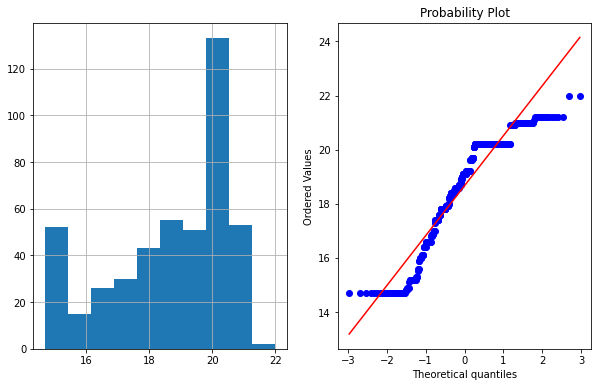

LOG TRANSFORMATION


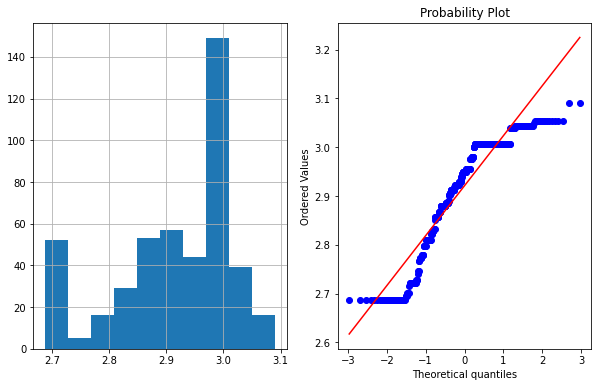

SQUARE TRANSFORMATION


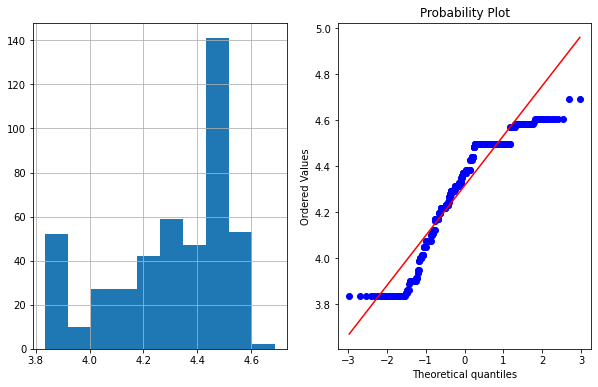

YEO JOHNSON TRANSFORMATION


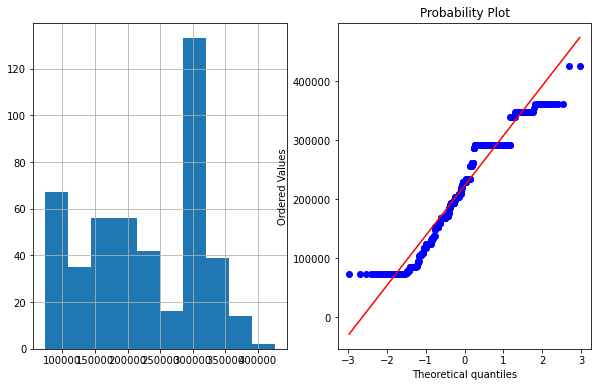

************************************************************************************************************************
LSTAT
Without transformation


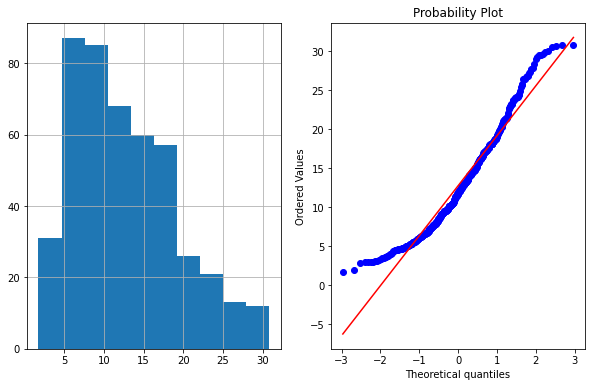

LOG TRANSFORMATION


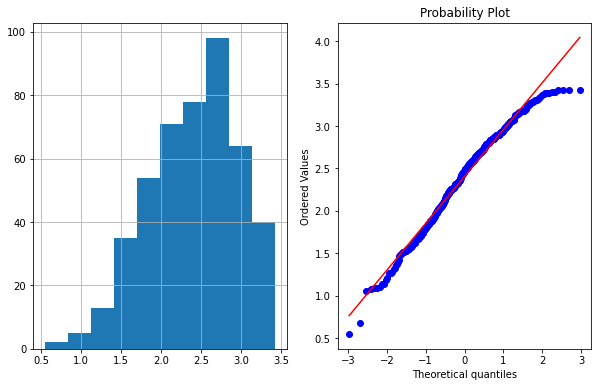

SQUARE TRANSFORMATION


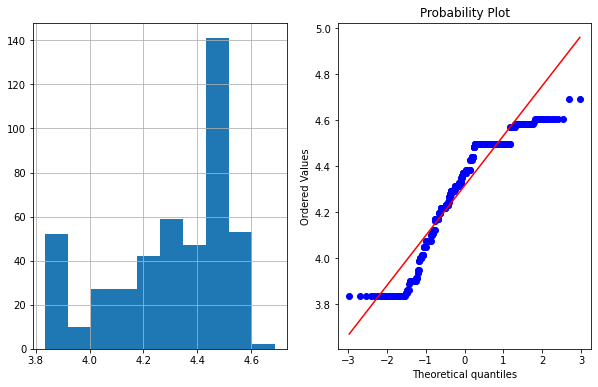

YEO JOHNSON TRANSFORMATION


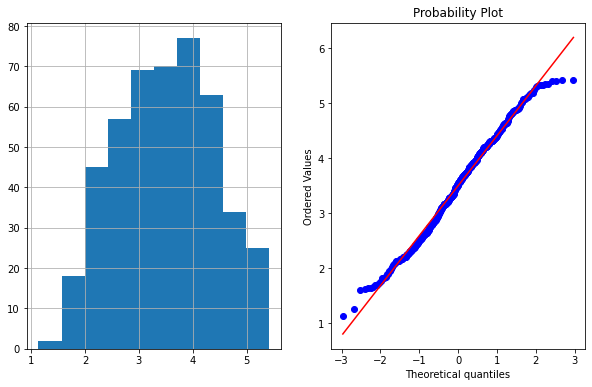

************************************************************************************************************************


In [140]:
#Transformation of each features
#Types of transformation used--log,square,yeo johnson
for i in df_trans.columns:
    print(i)
    print('Without transformation')
    plot_data(df_trans,i)
    print('LOG TRANSFORMATION')
    df_trans[i+'_log']=np.log(df_trans[i])
    plot_data(df_trans,i+'_log')
    print('SQUARE TRANSFORMATION')
    df_trans[i+'_square']=df_trans.PTRATIO**(1/2)
    plot_data(df_trans,i+'_square')
    print('YEO JOHNSON TRANSFORMATION')
    #df_trans[i+'_Boxcox'],parameters=stat.boxcox(df_trans[i])
    df_trans[i+'_yj']=pt.fit_transform(df_trans[[i]])
    plot_data(df_trans,i+'_yj')
    print('*'*120)

In [141]:
#Dataset with all transformation
df_trans.head()

,RM,PTRATIO,LSTAT,RM_log,RM_square,RM_yj,PTRATIO_log,PTRATIO_square,PTRATIO_yj,LSTAT_log,LSTAT_square,LSTAT_yj
0,6.575,15.3,4.98,1.883275,3.911521,2.231043,2.727853,3.911521,86911.770314,1.605430,3.911521,2.238042
1,6.421,17.8,9.14,1.859574,4.219005,2.206207,2.879198,4.219005,168101.233612,2.212660,4.219005,3.106538
2,7.185,17.8,4.03,1.971996,4.219005,2.325127,2.879198,4.219005,168101.233612,1.393766,4.219005,1.976820
3,6.998,18.7,2.94,1.945624,4.324350,2.296980,2.928524,4.324350,208668.901710,1.078410,4.324350,1.626169
4,7.147,18.7,5.33,1.966693,4.324350,2.319455,2.928524,4.324350,208668.901710,1.673351,4.324350,2.326345


### Observation from above analysis
#### 1) RM--no transformation required
#### 2) PTRATIO ,LSTAT -- Yeo johnson transformation required

In [142]:
#Final dataset after transformation
x_t=x.copy()
x_t[['PTRATIO','LSTAT']]=pt.fit_transform(x[['PTRATIO','LSTAT']])

In [143]:
x_t

,RM,PTRATIO,LSTAT
0,6.575,86911.770314,2.238042
1,6.421,168101.233612,3.106538
2,7.185,168101.233612,1.976820
3,6.998,208668.901710,1.626169
4,7.147,208668.901710,2.326345
...,...,...,...
501,6.593,347666.771804,3.196354
502,6.120,347666.771804,3.096148
503,6.976,347666.771804,2.401516
504,6.794,347666.771804,2.592631


## Model Building

In [35]:
#importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import pickle

In [144]:
#Standardise the data
sc=StandardScaler()
x_scaled=sc.fit_transform(x_t)

In [145]:
x_scaled

array([[ 0.70045916, -1.56111517, -1.38728365],
       [ 0.39695856, -0.62928192, -0.42987353],
       [ 1.90263684, -0.62928192, -1.67524831],
       ...,
       [ 1.49074318,  1.43163994, -1.20707322],
       [ 1.13206065,  1.43163994, -0.99639228],
       [-0.37361763,  1.43163994, -0.68207185]])

In [149]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=1,test_size =0.25)

In [150]:
lr=linear_model.LinearRegression()   #Object Initialisation
lr.fit(x_train,y_train)              #training the model using train data

LinearRegression()

In [151]:
y_pred=lr.predict(x_test)           #predicting test data using trained model

In [152]:
#Using cross validation with 10 folds
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x_train,y_train,cv=10)
score.mean()

0.6378713071097443

In [158]:
#function to calculate adjusted r2 for linear regression
def adj_r2(a,b,model):
    #scores=cross_val_score(model, a, b, cv=10)
    #r2 = scores.mean()
    r2=model.score(a,b)
    n = a.shape[0]
    p = a.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

def adj_r2new(a,b,model):
    scores=cross_val_score(model, a, b, cv=10)
    #r2 = scores.mean()
    n = a.shape[0]
    p = a.shape[1]
    ar_list=[]
    for i in scores:
        adjusted_r2 = 1-(1-i)*(n-1)/(n-p-1)
        ar_list.append(adjusted_r2)
    return sum(ar_list)/len(ar_list)

In [154]:
lr.score(x_train,y_train)    #R squared value for trainig data

0.6604238160499019

In [155]:
lr.score(x_test,y_test)      #R squared value for test data

0.6822985961931579

In [156]:
print(adj_r2(x_train,y_train,lr))        #Adjusted r squared for training data
print(adj_r2new(x_train,y_train,lr))     #Adjusted r squared for trainig data with cv

0.65743634229081
0.6346854241810911


In [157]:
print(adj_r2(x_test,y_test,lr))         #Adjusted r squared for test data
print(adj_r2new(x_test,y_test,lr))      #Adjusted r squared for test data with cv

0.6737120717659459
0.642327922873269


#### Linear regression model gives train accuracy of 63.46% and test accuracy of 64.23 %
#### There is no overfitting so no need of ridge and lasso regularisation.
#### The test accuracy is better then train accuracy and the values are close,so we can say there is some stability in the model

## Saving the model

In [173]:
pickle.dump(lr, open('linear_model.sav', 'wb'))

In [264]:
pickle.dump(sc, open('stand.sav', 'wb'))

In [265]:
pickle.dump(pt, open('p_transform.sav', 'wb'))

In [250]:
a,b,c=6.012,15.2,12.43

In [251]:
x=pt.transform(np.array([b,c]).reshape(1,-1))
x

array([[8.44739959e+04, 3.61599586e+00]])

In [252]:
y=np.array([a],ndmin=2)
y

array([[6.012]])

In [253]:
arr=np.append(y,x)

In [254]:
z=sc.transform([arr])
z

array([[-0.40909173, -1.58909416,  0.13174072]])

In [255]:
lr.predict(z)

array([21.9162545])

In [243]:
df_final.head(10)

,RM,PTRATIO,LSTAT,Target
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2
5,6.430,18.7,5.21,28.7
6,6.012,15.2,12.43,22.9
7,6.172,15.2,19.15,27.1
8,5.631,15.2,29.93,16.5
9,6.004,15.2,17.10,18.9


In [262]:
filename1 = 'p_transform.sav'
load_trans = pickle.load(open(filename1, 'rb'))

In [263]:
load_trans.transform(np.array([b,c]).reshape(1,-1))

AttributeError: 'LinearRegression' object has no attribute 'transform'